In [14]:
from PIL import Image             #Estamos usando la librería Pillow con PIL
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica
%matplotlib inline

def umbral(img, umbral):
    
    filas = np.size(img,0)
    columnas = np.size(img,1)
    
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if img[i,j] <= umbral:
                new_Img[i,j] = 0
            else:
                new_Img[i,j] = 255

    return new_Img


def conjuntoS(ee):
    S = set()
    for i in range(np.size(ee,0)):
        for j in range(np.size(ee,1)):
            if ee[i][j] == 1:
                S.add((i,j))
    return S

def crearConjuntoX(img_bin):
    filas = np.size(img_bin,0)
    columnas = np.size(img_bin,1)
    X = set()
    for i in range(0,filas):
        for j in range(0, columnas):
            if(img_bin[i,j] == 255):
                X.add((i,j))
    return X, filas, columnas

def crearMatriz(conjunto, filas, columnas):
    matrix = np.zeros((filas + 3,columnas + 3))
    for c in conjunto:
        matrix[c[0], c[1]] = 255
        
    return matrix

def dilatacion(img_bin, ee):
    X, filas, columnas = crearConjuntoX(img_bin)
    S = conjuntoS(ee)
    d = set()
    sList = list(S)
    for xs in X:
        d.add( ( xs[0] + sList[1][0] , xs[1] + sList[1][1] ))
        d.add( ( xs[0] + sList[0][0] , xs[1] + sList[0][1] ))
    matrizDilatada = crearMatriz(d, filas, columnas)
    return matrizDilatada
    
def erosion(img_bin, ee):
    X, filas, columnas = crearConjuntoX(img_bin)
    S = conjuntoS(ee)
    e = set()
    sList = list(S)
    for xs in X:
        a = ( xs[0] + sList[1][0] , xs[1] + sList[1][1] )
        if (a in X):
            b = ( xs[0] + sList[0][0] , xs[1] + sList[0][1] )
            if (b in X):
                e.add(xs)
    matrizErocionada = crearMatriz(e, filas, columnas)
    return matrizErocionada
    
a = np.matrix([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 1, 0, 0, 0],[1, 1, 0, 0, 0], [0, 0, 0, 0, 0]]) 
ee = np.array([[1,1]])
erosion(a, ee)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

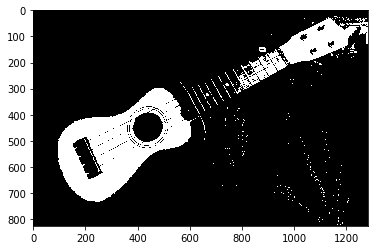

In [2]:
ukelele = Image.open("ukelele.jpeg")
uke_gris = ukelele.convert('L')
Img_uke = np.asarray(uke_gris,dtype=np.float32)

matrixBinaria = umbral(Img_uke,160)
ee = np.array([[0,1,0],[1,1,1],[0,1,0]])


Img = Image.fromarray(dilatacion(matrixBinaria, ee).astype(np.uint8))
plt.imshow(Img, cmap='gray')